In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt



pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)

In [3]:
app_data = pd.read_csv('application_data.csv')
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# shape of the data
app_data.shape

(307511, 122)

In [5]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
# checking null value
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
# finiding percentage of null value
round(app_data.isnull().sum() / app_data.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [9]:
#making new data frame for percentage of null value.
null_app_data = pd.DataFrame((round(app_data.isnull().sum() / app_data.shape[0] * 100.00,2)).reset_index())

In [10]:

null_app_data.columns = ['columns','percentage']
null_app_data

columns  percentage
0                      SK_ID_CURR        0.00
1                          TARGET        0.00
2              NAME_CONTRACT_TYPE        0.00
3                     CODE_GENDER        0.00
4                    FLAG_OWN_CAR        0.00
5                 FLAG_OWN_REALTY        0.00
6                    CNT_CHILDREN        0.00
7                AMT_INCOME_TOTAL        0.00
8                      AMT_CREDIT        0.00
9                     AMT_ANNUITY        0.00
10                AMT_GOODS_PRICE        0.09
11                NAME_TYPE_SUITE        0.42
12               NAME_INCOME_TYPE        0.00
13            NAME_EDUCATION_TYPE        0.00
14             NAME_FAMILY_STATUS        0.00
15              NAME_HOUSING_TYPE        0.00
16     REGION_POPULATION_RELATIVE        0.00
17                     DAYS_BIRTH        0.00
18                  DAYS_EMPLOYED        0.00
19              DAYS_REGISTRATION        0.00
20                DAYS_ID_PUBLISH        0.00
21                    OWN_CAR_AGE       65.99
22                     FLAG_MOBIL        0.00
23                 FLAG_EMP_PHONE        0.00
24                FLAG_WORK_PHONE        0.00
25               FLAG_CONT_MOBILE        0.00
26                     FLAG_PHONE        0.00
27                     FLAG_EMAIL        0.00
28                OCCUPATION_TYPE       31.35
29                CNT_FAM_MEMBERS        0.00
30           REGION_RATING_CLIENT        0.00
31    REGION_RATING_CLIENT_W_CITY        0.00
32     WEEKDAY_APPR_PROCESS_START        0.00
33        HOUR_APPR_PROCESS_START        0.00
34     REG_REGION_NOT_LIVE_REGION        0.00
35     REG_REGION_NOT_WORK_REGION        0.00
36    LIVE_REGION_NOT_WORK_REGION        0.00
37         REG_CITY_NOT_LIVE_CITY        0.00
38         REG_CITY_NOT_WORK_CITY        0.00
39        LIVE_CITY_NOT_WORK_CITY        0.00
40              ORGANIZATION_TYPE        0.00
41                   EXT_SOURCE_1       56.38
42                   EXT_SOURCE_2        0.21
43                   EXT_SOURCE_3       19.83
44                 APARTMENTS_AVG       50.75
45               BASEMENTAREA_AVG       58.52
46    YEARS_BEGINEXPLUATATION_AVG       48.78
47                YEARS_BUILD_AVG       66.50
48                 COMMONAREA_AVG       69.87
49                  ELEVATORS_AVG       53.30
50                  ENTRANCES_AVG       50.35
51                  FLOORSMAX_AVG       49.76
52                  FLOORSMIN_AVG       67.85
53                   LANDAREA_AVG       59.38
54           LIVINGAPARTMENTS_AVG       68.35
55                 LIVINGAREA_AVG       50.19
56        NONLIVINGAPARTMENTS_AVG       69.43
57              NONLIVINGAREA_AVG       55.18
58                APARTMENTS_MODE       50.75
59              BASEMENTAREA_MODE       58.52
60   YEARS_BEGINEXPLUATATION_MODE       48.78
61               YEARS_BUILD_MODE       66.50
62                COMMONAREA_MODE       69.87
63                 ELEVATORS_MODE       53.30
64                 ENTRANCES_MODE       50.35
65                 FLOORSMAX_MODE       49.76
66                 FLOORSMIN_MODE       67.85
67                  LANDAREA_MODE       59.38
68          LIVINGAPARTMENTS_MODE       68.35
69                LIVINGAREA_MODE       50.19
70       NONLIVINGAPARTMENTS_MODE       69.43
71             NONLIVINGAREA_MODE       55.18
72                APARTMENTS_MEDI       50.75
73              BASEMENTAREA_MEDI       58.52
74   YEARS_BEGINEXPLUATATION_MEDI       48.78
75               YEARS_BUILD_MEDI       66.50
76                COMMONAREA_MEDI       69.87
77                 ELEVATORS_MEDI       53.30
78                 ENTRANCES_MEDI       50.35
79                 FLOORSMAX_MEDI       49.76
80                 FLOORSMIN_MEDI       67.85
81                  LANDAREA_MEDI       59.38
82          LIVINGAPARTMENTS_MEDI       68.35
83                LIVINGAREA_MEDI       50.19
84       NONLIVINGAPARTMENTS_MEDI       69.43
85             NONLIVINGAREA_MEDI       55.18
86             FONDKAPRE

In [11]:
#coulumn which is having null value greater then 40%
nullcol_40_app = null_app_data[null_app_data.percentage>=40]
nullcol_40_app

columns  percentage
21                   OWN_CAR_AGE       65.99
41                  EXT_SOURCE_1       56.38
44                APARTMENTS_AVG       50.75
45              BASEMENTAREA_AVG       58.52
46   YEARS_BEGINEXPLUATATION_AVG       48.78
47               YEARS_BUILD_AVG       66.50
48                COMMONAREA_AVG       69.87
49                 ELEVATORS_AVG       53.30
50                 ENTRANCES_AVG       50.35
51                 FLOORSMAX_AVG       49.76
52                 FLOORSMIN_AVG       67.85
53                  LANDAREA_AVG       59.38
54          LIVINGAPARTMENTS_AVG       68.35
55                LIVINGAREA_AVG       50.19
56       NONLIVINGAPARTMENTS_AVG       69.43
57             NONLIVINGAREA_AVG       55.18
58               APARTMENTS_MODE       50.75
59             BASEMENTAREA_MODE       58.52
60  YEARS_BEGINEXPLUATATION_MODE       48.78
61              YEARS_BUILD_MODE       66.50
62               COMMONAREA_MODE       69.87
63                ELEVATORS_MODE       53.30
64                ENTRANCES_MODE       50.35
65                FLOORSMAX_MODE       49.76
66                FLOORSMIN_MODE       67.85
67                 LANDAREA_MODE       59.38
68         LIVINGAPARTMENTS_MODE       68.35
69               LIVINGAREA_MODE       50.19
70      NONLIVINGAPARTMENTS_MODE       69.43
71            NONLIVINGAREA_MODE       55.18
72               APARTMENTS_MEDI       50.75
73             BASEMENTAREA_MEDI       58.52
74  YEARS_BEGINEXPLUATATION_MEDI       48.78
75              YEARS_BUILD_MEDI       66.50
76               COMMONAREA_MEDI       69.87
77                ELEVATORS_MEDI       53.30
78                ENTRANCES_MEDI       50.35
79                FLOORSMAX_MEDI       49.76
80                FLOORSMIN_MEDI       67.85
81                 LANDAREA_MEDI       59.38
82         LIVINGAPARTMENTS_MEDI       68.35
83               LIVINGAREA_MEDI       50.19
84      NONLIVINGAPARTMENTS_MEDI       69.43
85            NONLIVINGAREA_MEDI       55.18
86            FONDKAPREMONT_MODE       68.39
87                HOUSETYPE_MODE       50.18
88                TOTALAREA_MODE       48.27
89            WALLSMATERIAL_MODE       50.84
90           EMERGENCYSTATE_MODE       47.40

In [12]:
nullcol_40_app.shape

(49, 2)

<AxesSubplot:ylabel='TARGET'>

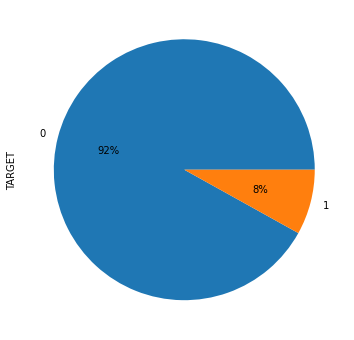

In [13]:
#checking percentage of default and pays on time.
plt.figure(figsize=[12,6])
app_data['TARGET'].value_counts().plot.pie(autopct='%1.f%%')

In [14]:
app_data['TARGET'].value_counts()/app_data.shape[0]*100,2

(0    91.927118
 1     8.072882
 Name: TARGET, dtype: float64,
 2)

In [15]:
# deleting column 
app_data = app_data.loc[:,(round(app_data.isnull().sum() / app_data.shape[0] * 100.00,2)<=40)]

#app_data = app_data.loc[:,app_data.isnull().sum(axis=0) <= 123004.4]
#app_data.shape

In [16]:
app_data.shape

(307511, 73)

In [17]:
#checking null value again.
app_data.isnull().sum()/ app_data.shape[0] * 100.00,2


(SK_ID_CURR                      0.000000
 TARGET                          0.000000
 NAME_CONTRACT_TYPE              0.000000
 CODE_GENDER                     0.000000
 FLAG_OWN_CAR                    0.000000
 FLAG_OWN_REALTY                 0.000000
 CNT_CHILDREN                    0.000000
 AMT_INCOME_TOTAL                0.000000
 AMT_CREDIT                      0.000000
 AMT_ANNUITY                     0.003902
 AMT_GOODS_PRICE                 0.090403
 NAME_TYPE_SUITE                 0.420148
 NAME_INCOME_TYPE                0.000000
 NAME_EDUCATION_TYPE             0.000000
 NAME_FAMILY_STATUS              0.000000
 NAME_HOUSING_TYPE               0.000000
 REGION_POPULATION_RELATIVE      0.000000
 DAYS_BIRTH                      0.000000
 DAYS_EMPLOYED                   0.000000
 DAYS_REGISTRATION               0.000000
 DAYS_ID_PUBLISH                 0.000000
 FLAG_MOBIL                      0.000000
 FLAG_EMP_PHONE                  0.000000
 FLAG_WORK_PHONE                 0

In [18]:
#count of occupation type
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [19]:
#imputing null value in occupation type with mode.
app_data['OCCUPATION_TYPE'] = app_data['OCCUPATION_TYPE'].fillna(app_data['OCCUPATION_TYPE'].mode()[0])


In [20]:
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [21]:
app_data['EXT_SOURCE_3'].mean()

0.5108529061800121

In [22]:
app_data['EXT_SOURCE_3'].median()


0.5352762504724826

In [23]:
#imputing null value of Ext_source_3 with mean value.
app_data['EXT_SOURCE_3'] = app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].mean())


In [24]:
#checking null value in ext_source_3.
app_data['EXT_SOURCE_3'].isnull().sum()

0

In [25]:
app_data[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',      
         'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()   

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [26]:
#imputing null value above column with mean.

app_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median())
app_data['AMT_REQ_CREDIT_BUREAU_DAY'] = app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].median())
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
app_data['AMT_REQ_CREDIT_BUREAU_MON'] = app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_MON'].median())
app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].median())
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median())


In [27]:
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [28]:
#checking null value in ext_source_2
app_data[app_data['EXT_SOURCE_2'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
329         100377       0         Cash loans           M            N   
349         100402       0         Cash loans           F            N   
617         100706       0         Cash loans           F            N   
1028        101189       0         Cash loans           F            Y   
1520        101787       0         Cash loans           M            Y   
2098        102466       0         Cash loans           F            N   
2426        102831       0         Cash loans           F            N   
2448        102855       0         Cash loans           F            Y   
2756        103215       0         Cash loans           F            N   
3212        103750       0         Cash loans           F            N   
3456        104033       0         Cash loans           F            N   
3525        104116       1         Cash loans           F            N   
3812        104454       0         Cash loans           F            N   
4458        105211       0         Cash loans           M            Y   
4562        105334       0         Cash loans           M            N   
4748        105550       0         Cash loans           F            N   
5892        106897       0         Cash loans           M            N   
6138        107173       0         Cash loans           F            N   
6432        107501       0    Revolving loans           F            N   
6992        108143       0         Cash loans           F            N   
7220        108403       0    Revolving loans           F            N   
7402        108629       0         Cash loans           F            N   
7491        108733       1         Cash loans           F            N   
7730        109018       0         Cash loans           F            N   
9117        110599       0         Cash loans           F            N   
9184        110677       0         Cash loans           F            N   
10050       111697       0         Cash loans           M            N   
10881       112662       0         Cash loans           F            N   
10910       112701       0         Cash loans           F            Y   
11400       113271       0         Cash loans           F            N   
11881       113848       0         Cash loans           F            N   
12065       114071       0         Cash loans           M            Y   
12386       114438       0         Cash loans           F            N   
12516       114587       0         Cash loans           F            N   
12825       114949       0         Cash loans           F            N   
12898       115032       0         Cash loans           F            N   
13499       115734       0         Cash loans           F            N   
14314       116698       0         Cash loans           F            Y   
14714       117166       0         Cash loans           F            N   
14869       117356       0         Cash loans           F            N   
15709       118330       0         Cash loans           M            Y   
15795       118434       1         Cash loans           M            Y   
15858       118504       0         Cash loans           M            Y   
16376       119100       0         Cash loans           F            N   
16498       119244       0         Cash loans           F            N   
16505       119254       0         Cash loans           F            N   
17029       119865       0         Cash loans           F            Y   
17436       120336       0         Cash loans           M            Y   
18349       121404       0         Cash loans           F            N   
19661       122929       0         Cash loans           M            Y   
20042       123380       0    Revolving loans           M            Y   
20686       124115       0         Cash loans           F            N   
20843       124290       0         Cash loans           F            N   
20988       

In [29]:
app_data.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [30]:
#checking all column with start with days to check any inconsistency.
minus_columns = []
for col in app_data:
    if col.startswith('DAYS'):
        minus_columns.append(col)

In [31]:
minus_columns

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [32]:
#all above column having negative sign, making it to absulute value.
app_data[minus_columns]= abs(app_data[minus_columns])

In [33]:
app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801      9461.0   
1       House / apartment                    0.003541     16765.0   
2       House / apartment                    0.010032     19046.0   
3       House / apartment                    0.008019     19005.0   
4       House / apartment                    0.028663     19932.0   
...                   ...                         ...         ...   
307506       With parents                    0.032561      9327.0   
307507  House / apartment       

In [34]:
#checking count of name contract type.
app_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100


Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

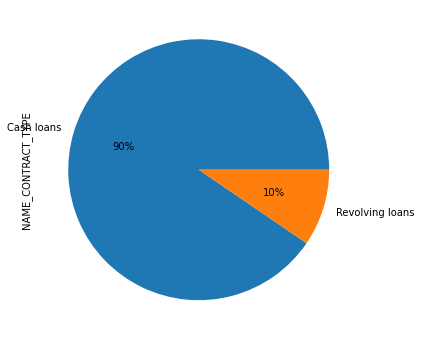

In [35]:
#plotting in pie plot for type of loan customer take.
plt.figure(figsize=[12,6])
app_data['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

In [36]:
app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801      9461.0   
1       House / apartment                    0.003541     16765.0   
2       House / apartment                    0.010032     19046.0   
3       House / apartment                    0.008019     19005.0   
4       House / apartment                    0.028663     19932.0   
...                   ...                         ...         ...   
307506       With parents                    0.032561      9327.0   
307507  House / apartment       

In [37]:
#checking income type of customer 
app_data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

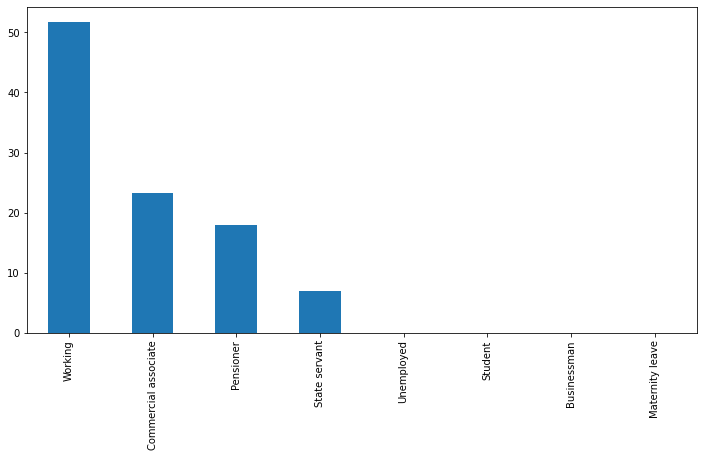

In [38]:
#plotting count of income type of customer. 
plt.figure(figsize=[12,6])
(app_data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

In [39]:
#count of occupation type.
app_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 49.291570
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

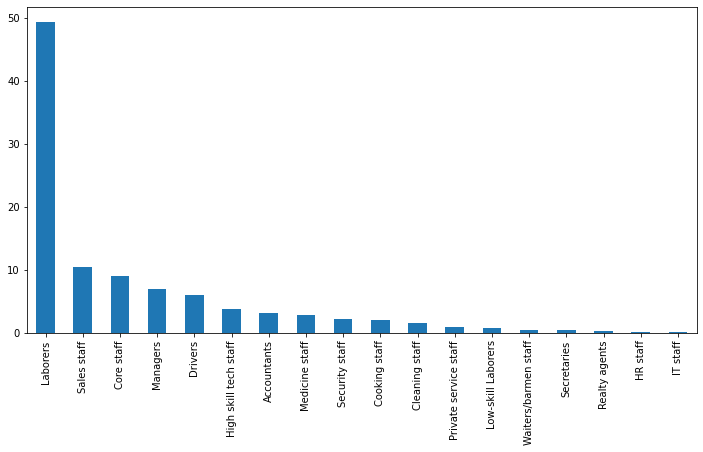

In [40]:
#plotting of count of occupation type.
plt.figure(figsize=[12,6])
(app_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

In [41]:
#checking count of education type of customer.
app_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

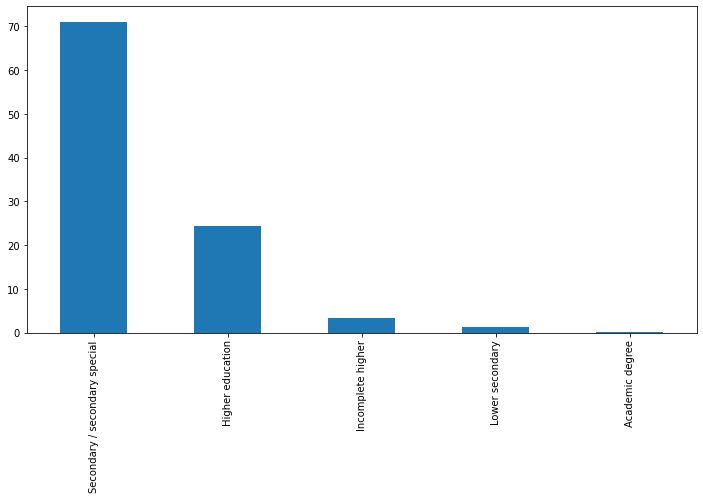

In [42]:
#Plotting education type of customer
plt.figure(figsize=[12,6])
(app_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

In [43]:
#count of family status of client
app_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

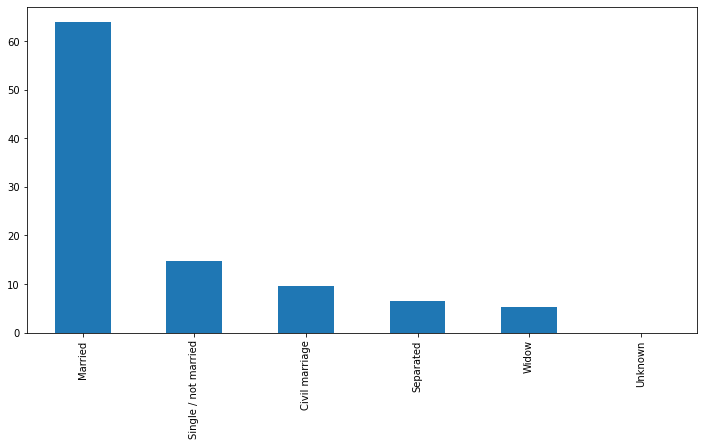

In [44]:
#plotting of family status of client
plt.figure(figsize=[12,6])
(app_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100).plot.bar()
plt.show()

In [45]:
#checking income type v/s default 
app_data.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts()

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
                      1           5360
Maternity leave       0              3
                      1              2
Pensioner             0          52380
                      1           2982
State servant         0          20454
                      1           1249
Student               0             18
Unemployed            0             14
                      1              8
Working               0         143550
                      1          15224
Name: TARGET, dtype: int64

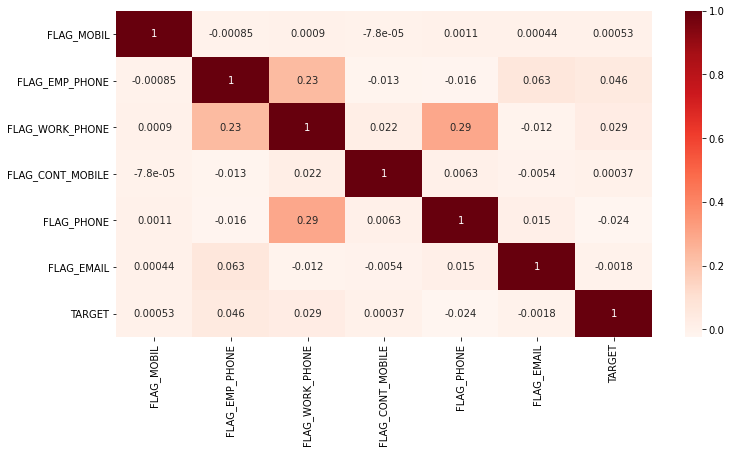

In [46]:
#checking corelation of target variable with coulmn 
#FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'.
plt.figure(figsize=[12,6])
sns.heatmap(app_data[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']].corr(),annot=True,cmap='Reds')
plt.show()


### There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

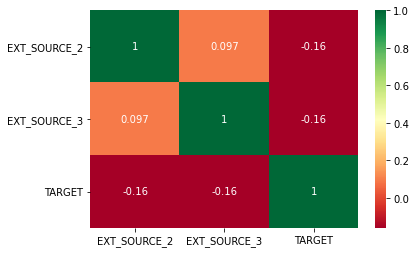

In [47]:
Source = app_data[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

### Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [48]:
# checking value count of male and female
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [49]:
app_data['CODE_GENDER'].value_counts()/app_data.shape[0] * 100.00

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

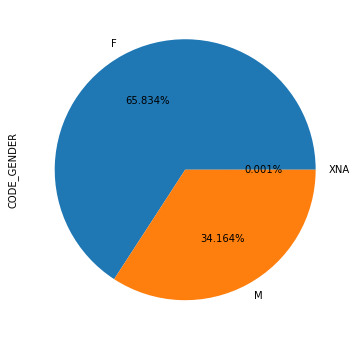

In [50]:
plt.figure(figsize=[12,6])
app_data['CODE_GENDER'].value_counts(normalize= True).plot.pie(autopct='%1.3f%%')
plt.show()

#the XNA in Code_gender is not known if it is NA or a category so leaving it as it is.

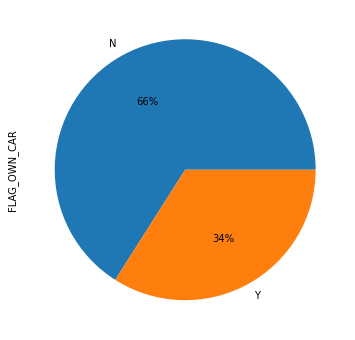

In [51]:
#plotting percentage of customer own car.
plt.figure(figsize=[12,6])
app_data['FLAG_OWN_CAR'].value_counts(normalize= True).plot.pie(autopct='%1.f%%')
plt.show()

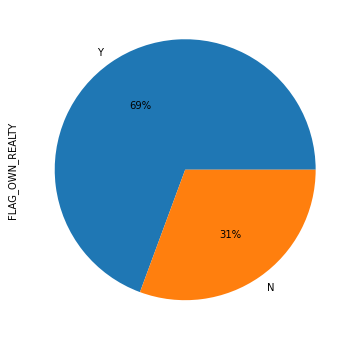

In [52]:
#plotting percentage of customer own house.
plt.figure(figsize=[12,6])
app_data['FLAG_OWN_REALTY'].value_counts(normalize= True).plot.pie(autopct='%1.f%%')
plt.show()

## Droping column which has no corelation with target variable

In [53]:
app_data.drop(labels='FLAG_EMP_PHONE',axis=1,inplace=True)
app_data.drop(labels='FLAG_WORK_PHONE',axis=1,inplace=True)
app_data.drop(labels='FLAG_CONT_MOBILE',axis=1,inplace=True)
app_data.drop(labels='FLAG_PHONE',axis=1,inplace=True)
app_data.drop(labels='FLAG_EMAIL',axis=1,inplace=True)

        

In [54]:
app_data.drop(labels='FLAG_MOBIL',axis=1,inplace=True)

In [55]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801      9461.0          637.0             3648.0   
1                    0.003541     16765.0         1188.0             1186.0   
2                    0.010032     19046.0          225.0             4260.0   
3                    0.008019     19005.0         3039.0             9833.0   
4                    0.028663     19932.0         3038.0             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           2120.0        Laborers              1.0                     2   
1            291.0      Core staff              2.0                     1   
2           2531.0        Laborers              1.0                     2   
3           2437.0        Laborers              2.0                     2   
4           3458.0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

In [56]:
app_data.shape

(307511, 67)

In [57]:
app_data.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

In [58]:
app_data.shape

(307511, 65)

In [59]:
#checking if document is important for our analysis.
document = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [60]:
length = len(document)

In [61]:
df_flag = app_data[document+["TARGET"]]

In [62]:
df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

In [63]:
df_flag

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                     0                1                0                0   
1                     0                1                0                0   
2                     0                0                0                0   
3                     0                1                0                0   
4                     0                0                0                0   
...                 ...              ...              ...              ...   
307506                0                0                0                0   
307507                0                1                0                0   
307508                0                1                0                0   
307509                0                1                0                0   
307510                0                1                0                0   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                1                0   
...                 ...              ...              ...              ...   
307506                0                0                1                0   
307507                0                0                0                0   
307508                0                0                0                0   
307509                0                0                0                0   
307510                0                0                0                0   

        FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508              

In [64]:
app_flag = app_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']
app_flag['TARGET'] = app_data['TARGET']

In [65]:
app_flag

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                     0                1                0                0   
1                     0                1                0                0   
2                     0                0                0                0   
3                     0                1                0                0   
4                     0                0                0                0   
...                 ...              ...              ...              ...   
307506                0                0                0                0   
307507                0                1                0                0   
307508                0                1                0                0   
307509                0                1                0                0   
307510                0                1                0                0   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                1                0   
...                 ...              ...              ...              ...   
307506                0                0                1                0   
307507                0                0                0                0   
307508                0                0                0                0   
307509                0                0                0                0   
307510                0                0                0                0   

        FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508              

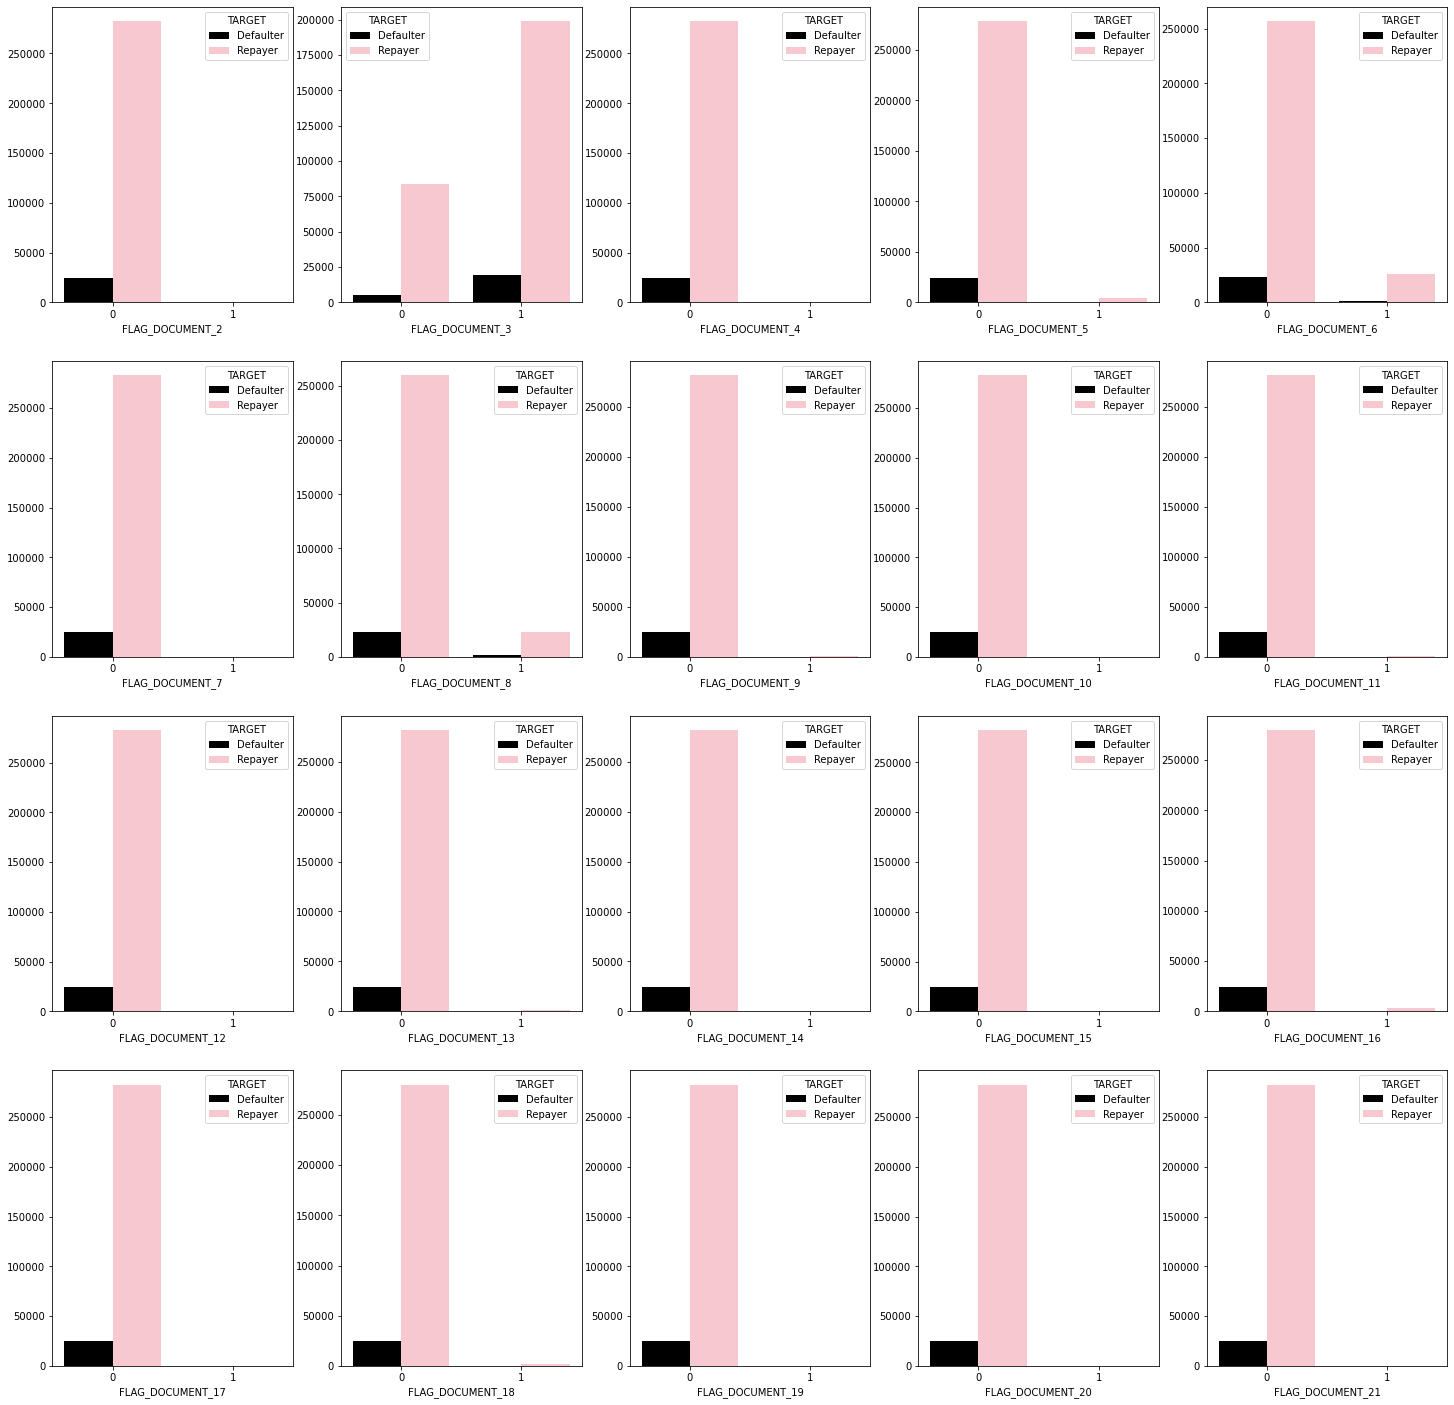

In [66]:
# Plotting the countplot of FLAG_DOCUMENTS with TARGET VARIABLE
fig = plt.figure(figsize=(25,25))
for a,b in zip(df_flag, range(0,20)): # range(0,20) : for 20 FLAG_DOCUMENTS
    plt.subplot(4,5,b+1)
    ax = sns.countplot(app_flag[a], hue = df_flag['TARGET'], palette = ['black', 'pink'])
    plt.ylabel("")

In [67]:
#Observation: People who submitted FLAG_DOCUMENT_3 are more likely to not default on loan and hence, 
#this must be an important document. While the other FLAG_DOCUMENTS follow a similar pattern 
#that is even if they did not submit, they were able to repay the loan. So, we should retain this 
#FLAG_DOCUMENT_3 column
#and drop the remaining FLAG_DOCUMENTS.

In [68]:
app_data.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [69]:
app_data.shape

(307511, 46)

In [70]:
app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801      9461.0   
1       House / apartment                    0.003541     16765.0   
2       House / apartment                    0.010032     19046.0   
3       House / apartment                    0.008019     19005.0   
4       House / apartment                    0.028663     19932.0   
...                   ...                         ...         ...   
307506       With parents                    0.032561      9327.0   
307507  House / apartment       

In [71]:
#converting age in days to year.
app_data['AGE'] = app_data['DAYS_BIRTH']//365


In [72]:
app_data['AGE'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

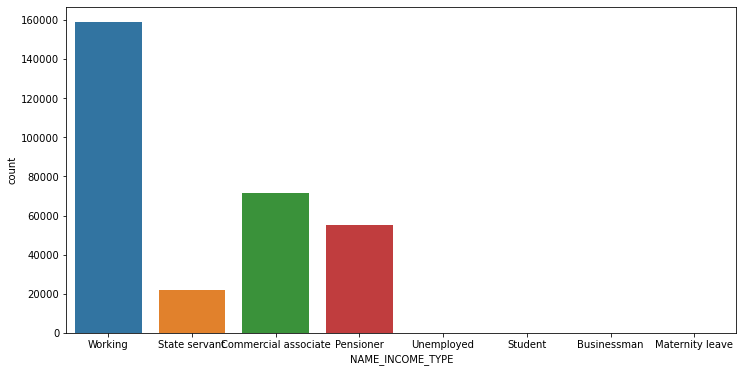

In [73]:

fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="NAME_INCOME_TYPE", data=app_data)

In [74]:
a =['NAME_INCOME_TYPE']
b= app_data[a+["TARGET",'AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY']]
b["TARGET"] = b["TARGET"].replace({1:"Defaulter",0:"Repayer"})
b

NAME_INCOME_TYPE     TARGET  AMT_CREDIT  AMT_INCOME_TOTAL  \
0                    Working  Defaulter    406597.5          202500.0   
1              State servant    Repayer   1293502.5          270000.0   
2                    Working    Repayer    135000.0           67500.0   
3                    Working    Repayer    312682.5          135000.0   
4                    Working    Repayer    513000.0          121500.0   
...                      ...        ...         ...               ...   
307506               Working    Repayer    254700.0          157500.0   
307507             Pensioner    Repayer    269550.0           72000.0   
307508               Working    Repayer    677664.0          153000.0   
307509  Commercial associate  Defaulter    370107.0          171000.0   
307510  Commercial associate    Repayer    675000.0          157500.0   

        AMT_ANNUITY  
0           24700.5  
1           35698.5  
2            6750.0  
3           29686.5  
4           21865.5  
...             ...  
307506      27558.0  
307507      12001.5  
307508      29979.0  
307509      20205.0  
307510      49117.5  

[307511 rows x 5 columns]

In [75]:
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION  

### Deleting null values rows

In [76]:
app_data = app_data[~app_data.AMT_ANNUITY.isnull()]

## checking for outlier.

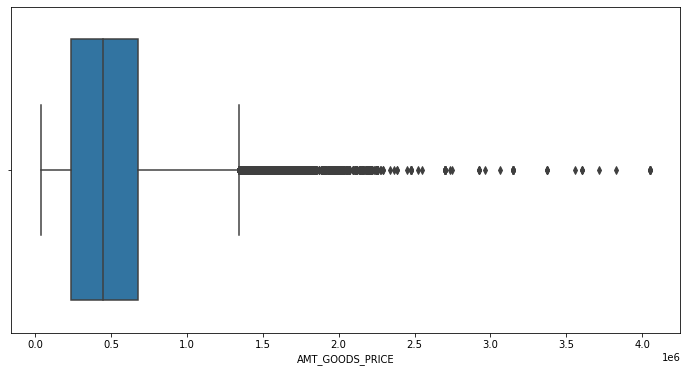

In [77]:
#boxplot for checking outlier in amounnt good price.
fig = plt.figure(figsize=(12,6))
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()

#as we can see there is some outliermost value lie below 1400000.

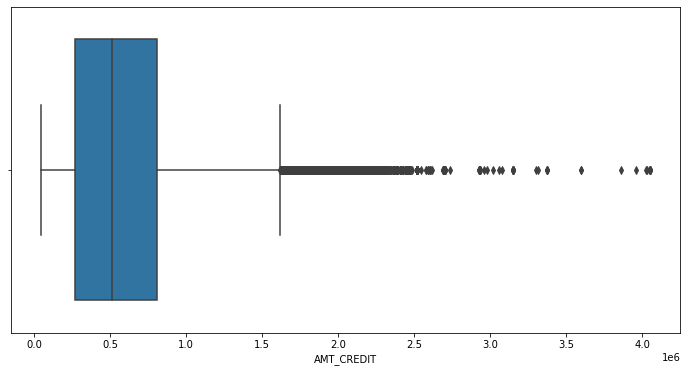

In [78]:
#boxplot for checking outlier in amounnt credit.
fig = plt.figure(figsize=(12,6))
sns.boxplot(app_data['AMT_CREDIT'])
plt.show()
#as we can see there is some outliermost value lie below 1600000.

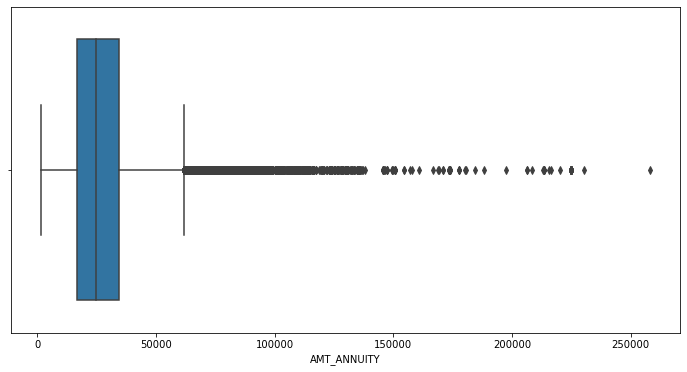

In [79]:
#boxplot for checking outlier in amounnt annuity.
fig = plt.figure(figsize=(12,6))
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()
#as we can see there is some outliermost value lie below 70000.

In [80]:
#imputing missing value in amount good price with median.
app_data['AMT_GOODS_PRICE'] = app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].median())

In [81]:
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [82]:
#imputing missing value of name type suit with mode
app_data['NAME_TYPE_SUITE'] = app_data['NAME_TYPE_SUITE'].fillna(app_data['NAME_TYPE_SUITE'].mode()[0])

In [83]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

2

In [84]:
app_data = app_data[~app_data.CNT_FAM_MEMBERS.isnull()]

In [85]:
app_data.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [86]:
app_data = app_data[~app_data.DAYS_LAST_PHONE_CHANGE.isnull()]

In [87]:
app_data[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
     'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306475.000000             306475.000000   
mean                   1.422292                  0.143428   
std                    2.401032                  0.446708   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306475.000000             306475.000000  
mean                   1.405338                  0.100054  
std                    2.379846                  0.362299  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [88]:
social = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
     'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [89]:
#imputing missing value for below column with median
for i in social:
    app_data[i].fillna(app_data[i].median(),inplace = True)

In [90]:
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

### Now in application data set we removed all unwanted coulmn and impute all null value. there is no null value in it.

In [91]:
#importing previous application data set
pre_data = pd.read_csv('previous_application.csv')
pre_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [92]:
pre_data.shape

(1670214, 37)

In [93]:
pre_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [94]:
#checking null value 
pre_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [95]:
#checking for precentage of null,value.
round((pre_data.isnull().sum()/pre_data.shape[0])*100,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [96]:
pre_data.isnull().shape

(1670214, 37)

## Removing column with more then 40% null value

In [97]:
null_pre_data = pd.DataFrame((round(pre_data.isnull().sum() / pre_data.shape[0] * 100.00,2)).reset_index())

In [98]:
null_pre_data.columns = ['columns','percentage']
null_pre_data

columns  percentage
0                    SK_ID_PREV        0.00
1                    SK_ID_CURR        0.00
2            NAME_CONTRACT_TYPE        0.00
3                   AMT_ANNUITY       22.29
4               AMT_APPLICATION        0.00
5                    AMT_CREDIT        0.00
6              AMT_DOWN_PAYMENT       53.64
7               AMT_GOODS_PRICE       23.08
8    WEEKDAY_APPR_PROCESS_START        0.00
9       HOUR_APPR_PROCESS_START        0.00
10  FLAG_LAST_APPL_PER_CONTRACT        0.00
11       NFLAG_LAST_APPL_IN_DAY        0.00
12            RATE_DOWN_PAYMENT       53.64
13        RATE_INTEREST_PRIMARY       99.64
14     RATE_INTEREST_PRIVILEGED       99.64
15       NAME_CASH_LOAN_PURPOSE        0.00
16         NAME_CONTRACT_STATUS        0.00
17                DAYS_DECISION        0.00
18            NAME_PAYMENT_TYPE        0.00
19           CODE_REJECT_REASON        0.00
20              NAME_TYPE_SUITE       49.12
21             NAME_CLIENT_TYPE        0.00
22          NAME_GOODS_CATEGORY        0.00
23               NAME_PORTFOLIO        0.00
24            NAME_PRODUCT_TYPE        0.00
25                 CHANNEL_TYPE        0.00
26             SELLERPLACE_AREA        0.00
27         NAME_SELLER_INDUSTRY        0.00
28                  CNT_PAYMENT       22.29
29             NAME_YIELD_GROUP        0.00
30          PRODUCT_COMBINATION        0.02
31           DAYS_FIRST_DRAWING       40.30
32               DAYS_FIRST_DUE       40.30
33    DAYS_LAST_DUE_1ST_VERSION       40.30
34                DAYS_LAST_DUE       40.30
35             DAYS_TERMINATION       40.30
36    NFLAG_INSURED_ON_APPROVAL       40.30

In [99]:
nullcol_40_pre = null_pre_data[null_pre_data.percentage>=40]
nullcol_40_pre

columns  percentage
6            AMT_DOWN_PAYMENT       53.64
12          RATE_DOWN_PAYMENT       53.64
13      RATE_INTEREST_PRIMARY       99.64
14   RATE_INTEREST_PRIVILEGED       99.64
20            NAME_TYPE_SUITE       49.12
31         DAYS_FIRST_DRAWING       40.30
32             DAYS_FIRST_DUE       40.30
33  DAYS_LAST_DUE_1ST_VERSION       40.30
34              DAYS_LAST_DUE       40.30
35           DAYS_TERMINATION       40.30
36  NFLAG_INSURED_ON_APPROVAL       40.30

In [100]:
nullcol_40_pre.shape

(11, 2)

In [101]:
pre_data = pre_data.loc[:,(round(pre_data.isnull().sum() / pre_data.shape[0] * 100.00,2)<=40)]

In [102]:
pre_data.shape

(1670214, 26)

In [103]:
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [104]:
pre_data.drop(Unnecessary_previous,axis = 1, inplace = True)

In [105]:
pre_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

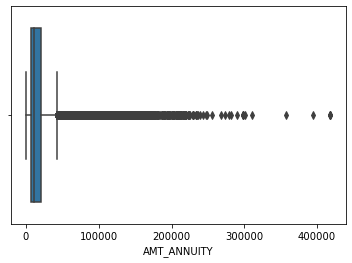

In [106]:
#cheking for outlier in amount annuity
sns.boxplot(pre_data['AMT_ANNUITY'])
plt.show()

In [107]:
pre_data['AMT_ANNUITY'].value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
30073.860        1
41845.365        1
36622.620        1
41864.760        1
63715.905        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [108]:
#imputing the missing value in amount annuity with median.
pre_data['AMT_ANNUITY'] = pre_data['AMT_ANNUITY'].fillna(pre_data['AMT_ANNUITY'].median())

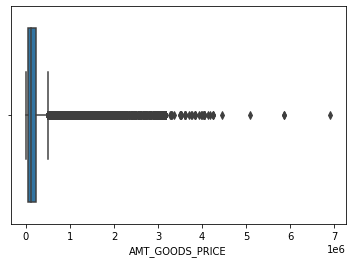

In [109]:
#checking outlier in amount goods price.
sns.boxplot(pre_data['AMT_GOODS_PRICE'])
plt.show()
#as we can see most value lie under 500000

In [110]:
pre_data['AMT_GOODS_PRICE'].value_counts()

45000.000     47831
225000.000    43549
135000.000    40666
450000.000    38926
90000.000     29367
              ...  
355626.000        1
247404.465        1
355594.500        1
355590.000        1
442350.000        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [111]:
#imputing missing value for amount good price with median
pre_data['AMT_GOODS_PRICE'] = pre_data['AMT_GOODS_PRICE'].fillna(pre_data['AMT_GOODS_PRICE'].median())

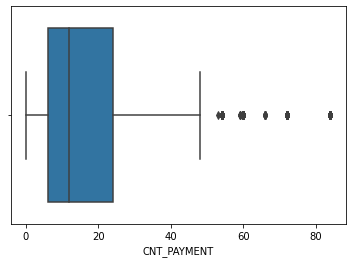

In [112]:
#checking missing for Term of previous credit at application of the previous application.
sns.boxplot(pre_data['CNT_PAYMENT'])
plt.show()

In [113]:
pre_data['CNT_PAYMENT'].median()

12.0

In [114]:
#imputing missing value with median
pre_data['CNT_PAYMENT'] = pre_data['CNT_PAYMENT'].fillna(pre_data['CNT_PAYMENT'].median())

In [115]:
# deleting null value from amt_credit
pre_data = pre_data[~pre_data.AMT_CREDIT.isnull()]

In [116]:
pre_data['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112581
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [117]:
#imputing missing value with mode in product dimension.
pre_data['PRODUCT_COMBINATION'] = pre_data['PRODUCT_COMBINATION'].fillna(pre_data['PRODUCT_COMBINATION'].mode()[0])

In [118]:
pre_data.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                0
AMT_GOODS_PRICE           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
NAME_PRODUCT_TYPE         0
CHANNEL_TYPE              0
SELLERPLACE_AREA          0
NAME_SELLER_INDUSTRY      0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION       0
dtype: int64

In [119]:
#As we can see there is null value in previous application and also deleted unwanted column.

In [120]:
pre_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [121]:
minus_columns = []
for col in pre_data:
    if col.startswith('DAYS'):
        minus_columns.append(col)

In [122]:
minus_columns

['DAYS_DECISION']

In [123]:
#day decision having negative value make it to positive 
pre_data[minus_columns]= abs(pre_data[minus_columns])

## Working on Application data for insight

In [124]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801      9461.0          637.0             3648.0   
1                    0.003541     16765.0         1188.0             1186.0   
2                    0.010032     19046.0          225.0             4260.0   
3                    0.008019     19005.0         3039.0             9833.0   
4                    0.028663     19932.0         3038.0             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           2120.0        Laborers              1.0                     2   
1            291.0      Core staff              2.0                     1   
2           2531.0        Laborers              1.0                     2   
3           2437.0        Laborers              2.0                     2   
4           3458.0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

In [125]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
app_data['AMT_INCOME_TOTAL']=app_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [126]:
app_data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735524
200k-300k    21.210425
0-100K       20.730056
300k-400k     4.775698
400k-500k     1.744428
500k-600k     0.356371
600k-700k     0.282819
800k-900k     0.096985
700k-800k     0.052723
900k-1M       0.009113
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

### From Above we can observe most of the loan application have income range below 300K (92%).

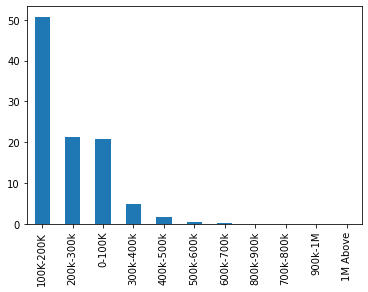

In [127]:
#plotting above observation in bar plot
(app_data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

In [128]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
app_data['AMT_CREDIT']=app_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins,labels=slot)

In [129]:
app_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    20.230019
500k-600k    12.634073
400k-500k    11.823913
100K-200K    11.124111
300k-400k     9.720818
600k-700k     8.875593
800k-900k     8.043287
700k-800k     7.083644
1M Above      4.953974
900k-1M       3.294529
0-100K        2.216038
Name: AMT_CREDIT_RANGE, dtype: float64

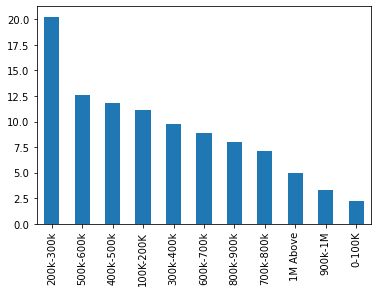

In [130]:
#plotting above observation in bar plot
(app_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

### More Than 16% loan applicants have taken loan which amounts to more than 1M.

In [131]:
# Binning Numerical Columns to create a categorical column

# Creating bins for age.

bins = [0,20,30,40,50,60,100]
slot = ['0-20','20-30','30-40','40-50','50-60','60 ABOVE']

app_data['AGE_RANGE']=pd.cut(app_data['AGE'],bins=bins,labels=slot)


In [132]:
app_data['AGE_RANGE'].value_counts(normalize=True)*100


30-40       27.028644
40-50       24.194461
50-60       22.054596
20-30       17.171280
60 ABOVE     9.550693
0-20         0.000325
Name: AGE_RANGE, dtype: float64

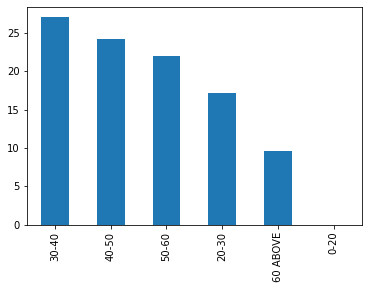

In [133]:
#plotting above observation in bar plot
(app_data['AGE_RANGE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

### Insight : Most of the loan application in the age group of 30-50 account for 51 %. also only 9% loan application                       above age 60.

In [134]:
# Creating bins for Employement Time
app_data['YEARS_EMPLOYED'] = app_data['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

app_data['EMPLOYMENT_YEAR']=pd.cut(app_data['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [135]:
app_data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100


0-5         55.583108
5-10        24.964655
10-20       14.565094
20-30        3.750318
30-40        1.058777
40-50        0.078048
60 above     0.000000
50-60        0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

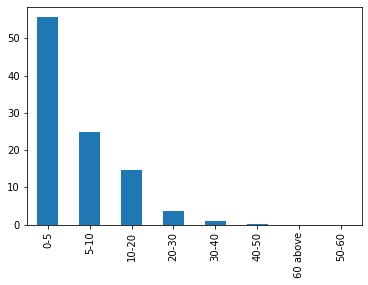

In [136]:
#plotting above observation in bar plot
(app_data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100).plot.bar()
plt.show()

In [137]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0             2.025    4.065975      24700.5   
1               N             0             2.700   12.935025      35698.5   
2               Y             0             0.675    1.350000       6750.0   
3               Y             0             1.350    3.126825      29686.5   
4               Y             0             1.215    5.130000      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801      9461.0          637.0             3648.0   
1                    0.003541     16765.0         1188.0             1186.0   
2                    0.010032     19046.0          225.0             4260.0   
3                    0.008019     19005.0         3039.0             9833.0   
4                    0.028663     19932.0         3038.0             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           2120.0        Laborers              1.0                     2   
1            291.0      Core staff              2.0                     1   
2           2531.0        Laborers              1.0                     2   
3           2437.0        Laborers              2.0                     2   
4           3458.0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

### Most of the loan application have experience 0-5 year.

# Categorical Variables Analysis( Segmented Univariate Analysis)

In [138]:
#creating new dataframe for name contract type and target variable
name_cont_type =['NAME_CONTRACT_TYPE']
new_col= app_data[name_cont_type+["TARGET"]]

In [139]:
new_col

NAME_CONTRACT_TYPE  TARGET
0              Cash loans       1
1              Cash loans       0
2         Revolving loans       0
3              Cash loans       0
4              Cash loans       0
...                   ...     ...
307506         Cash loans       0
307507         Cash loans       0
307508         Cash loans       0
307509         Cash loans       1
307510         Cash loans       0

[307496 rows x 2 columns]

In [140]:
app_data.groupby(['TARGET'])['NAME_CONTRACT_TYPE'].value_counts()

TARGET  NAME_CONTRACT_TYPE
0       Cash loans            254998
        Revolving loans        27673
1       Cash loans             23221
        Revolving loans         1604
Name: NAME_CONTRACT_TYPE, dtype: int64

### Revolving loan is small fraction from the total number of amount.

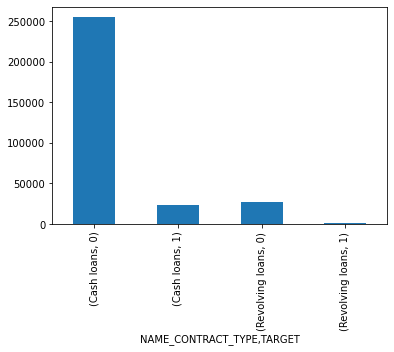

In [141]:
app_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().plot.bar()
plt.show()

In [142]:
#extracting only defaulter
def_data = new_col.loc[new_col['TARGET']==1,:]

In [143]:
def_data

NAME_CONTRACT_TYPE  TARGET
0              Cash loans       1
26             Cash loans       1
40             Cash loans       1
42             Cash loans       1
81             Cash loans       1
...                   ...     ...
307448         Cash loans       1
307475         Cash loans       1
307481         Cash loans       1
307489         Cash loans       1
307509         Cash loans       1

[24825 rows x 2 columns]

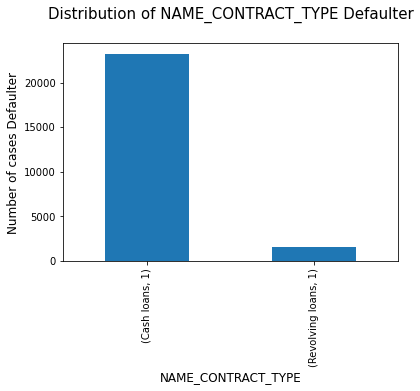

In [144]:
def_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of NAME_CONTRACT_TYPE Defaulter\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("NAME_CONTRACT_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Defaulter", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


In [145]:
#extracting pays on time 
rep_data = new_col.loc[new_col['TARGET']==0,:]

In [146]:
rep_data

NAME_CONTRACT_TYPE  TARGET
1              Cash loans       0
2         Revolving loans       0
3              Cash loans       0
4              Cash loans       0
5              Cash loans       0
...                   ...     ...
307505         Cash loans       0
307506         Cash loans       0
307507         Cash loans       0
307508         Cash loans       0
307510         Cash loans       0

[282671 rows x 2 columns]

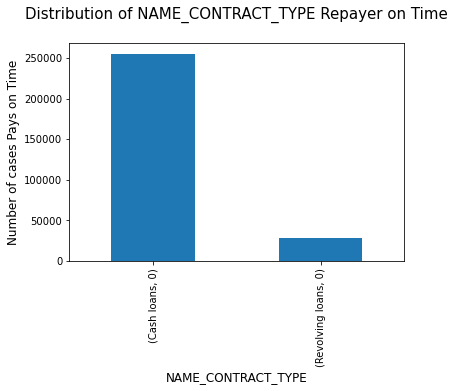

In [147]:
rep_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of NAME_CONTRACT_TYPE Repayer on Time\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("NAME_CONTRACT_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Pays on Time", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

## Insight:
### Although Revolving loan is very less as compare to total loan amount but larger amount of revolving loan not paid is high.          

In [148]:
#creating new dataframe for gender type and target variable
code_gender =['CODE_GENDER']
code = app_data[code_gender+["TARGET"]]
code

CODE_GENDER  TARGET
0                M       1
1                F       0
2                M       0
3                F       0
4                M       0
...            ...     ...
307506           M       0
307507           F       0
307508           F       0
307509           F       1
307510           F       0

[307496 rows x 2 columns]

In [149]:
#extract only defaulert and compare it.
defaulter = code.loc[code['TARGET']==1,:]
defaulter

CODE_GENDER  TARGET
0                M       1
26               F       1
40               M       1
42               F       1
81               F       1
...            ...     ...
307448           M       1
307475           F       1
307481           M       1
307489           F       1
307509           F       1

[24825 rows x 2 columns]

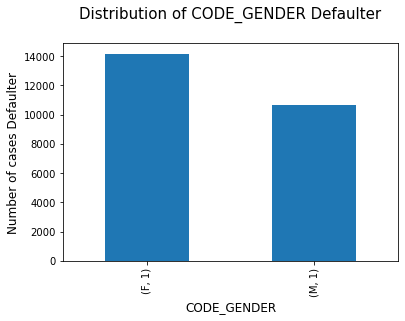

In [150]:
defaulter.groupby(['CODE_GENDER'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of CODE_GENDER Defaulter\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("CODE_GENDER", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Defaulter", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [151]:
#comparing for pay on time.
repayer = code.loc[code['TARGET']==0,:]
repayer

CODE_GENDER  TARGET
1                F       0
2                M       0
3                F       0
4                M       0
5                M       0
...            ...     ...
307505           F       0
307506           M       0
307507           F       0
307508           F       0
307510           F       0

[282671 rows x 2 columns]

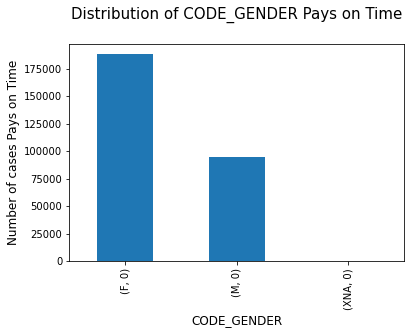

In [152]:
repayer.groupby(['CODE_GENDER'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of CODE_GENDER Pays on Time\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("CODE_GENDER", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Pays on Time", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

### Females is default higher, also male are less to pay on time.

In [153]:
#creating new dataframe for customer who car or not and target variable
flagcar =['FLAG_OWN_CAR']
car = app_data[flagcar+["TARGET"]]
car

FLAG_OWN_CAR  TARGET
0                 N       1
1                 N       0
2                 Y       0
3                 N       0
4                 N       0
...             ...     ...
307506            N       0
307507            N       0
307508            N       0
307509            N       1
307510            N       0

[307496 rows x 2 columns]

In [154]:
#compare it with default.
car_def = car.loc[car['TARGET']==1,:]
car_def

FLAG_OWN_CAR  TARGET
0                 N       1
26                N       1
40                N       1
42                N       1
81                N       1
...             ...     ...
307448            N       1
307475            N       1
307481            N       1
307489            N       1
307509            N       1

[24825 rows x 2 columns]

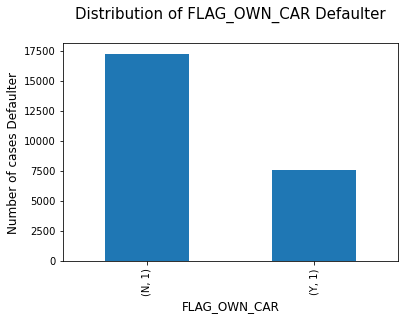

In [155]:
car_def.groupby(['FLAG_OWN_CAR'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of FLAG_OWN_CAR Defaulter\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("FLAG_OWN_CAR", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Defaulter", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [156]:
#compare it with pays on time
car_pay = car.loc[car['TARGET']==0,:]
car_pay

FLAG_OWN_CAR  TARGET
1                 N       0
2                 Y       0
3                 N       0
4                 N       0
5                 N       0
...             ...     ...
307505            N       0
307506            N       0
307507            N       0
307508            N       0
307510            N       0

[282671 rows x 2 columns]

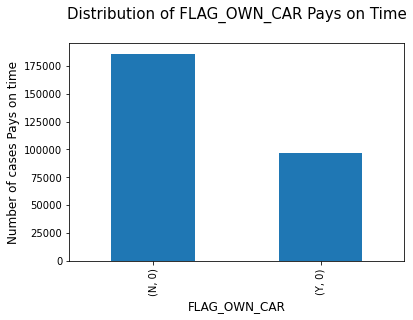

In [157]:
car_pay.groupby(['FLAG_OWN_CAR'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of FLAG_OWN_CAR Pays on Time\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("FLAG_OWN_CAR", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Pays on time", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

### customer who's having car are less defaulter.

In [158]:
#creating new dataframe for customer who own house or not and target variable
flaghouse =['FLAG_OWN_REALTY']
house = app_data[flaghouse+["TARGET"]]
house

FLAG_OWN_REALTY  TARGET
0                    Y       1
1                    N       0
2                    Y       0
3                    Y       0
4                    Y       0
...                ...     ...
307506               N       0
307507               Y       0
307508               Y       0
307509               Y       1
307510               N       0

[307496 rows x 2 columns]

In [159]:
#compare it with defaulter
house_def = house.loc[house['TARGET']==1,:]
house_def

FLAG_OWN_REALTY  TARGET
0                    Y       1
26                   Y       1
40                   Y       1
42                   N       1
81                   Y       1
...                ...     ...
307448               N       1
307475               N       1
307481               Y       1
307489               Y       1
307509               Y       1

[24825 rows x 2 columns]

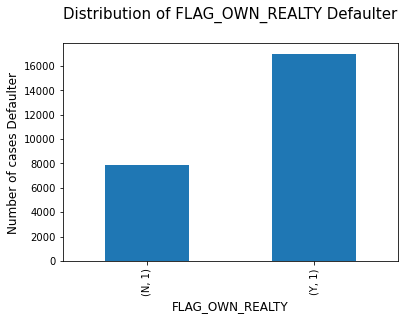

In [160]:
house_def.groupby(['FLAG_OWN_REALTY'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of FLAG_OWN_REALTY Defaulter\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("FLAG_OWN_REALTY", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Defaulter", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [161]:
#compare it with pays on time
house_pay = house.loc[house['TARGET']==0,:]
house_pay

FLAG_OWN_REALTY  TARGET
1                    N       0
2                    Y       0
3                    Y       0
4                    Y       0
5                    Y       0
...                ...     ...
307505               Y       0
307506               N       0
307507               Y       0
307508               Y       0
307510               N       0

[282671 rows x 2 columns]

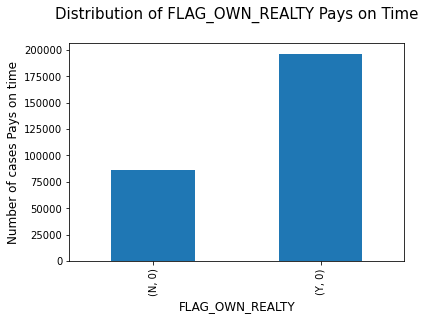

In [162]:
house_pay.groupby(['FLAG_OWN_REALTY'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of FLAG_OWN_REALTY Pays on Time\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("FLAG_OWN_REALTY", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Pays on time", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

### those who own house or without house has similar trend 

In [163]:
#creating new dataframe for name income type and target variable
income = app_data[['NAME_INCOME_TYPE']+["TARGET"]]
income

NAME_INCOME_TYPE  TARGET
0                    Working       1
1              State servant       0
2                    Working       0
3                    Working       0
4                    Working       0
...                      ...     ...
307506               Working       0
307507             Pensioner       0
307508               Working       0
307509  Commercial associate       1
307510  Commercial associate       0

[307496 rows x 2 columns]

In [164]:
#compare it with default
income_def = income.loc[income['TARGET']==1,:]
income_def

NAME_INCOME_TYPE  TARGET
0                    Working       1
26                   Working       1
40      Commercial associate       1
42                   Working       1
81                 Pensioner       1
...                      ...     ...
307448               Working       1
307475               Working       1
307481               Working       1
307489  Commercial associate       1
307509  Commercial associate       1

[24825 rows x 2 columns]

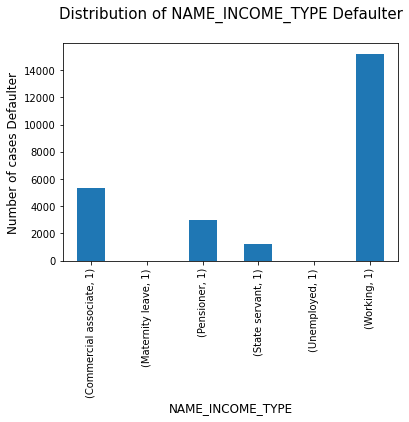

In [165]:
income_def.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of NAME_INCOME_TYPE Defaulter\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("NAME_INCOME_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Defaulter", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [166]:
#compare it with pays on time
income_pay = income.loc[income['TARGET']==0,:]
income_pay

NAME_INCOME_TYPE  TARGET
1              State servant       0
2                    Working       0
3                    Working       0
4                    Working       0
5              State servant       0
...                      ...     ...
307505             Pensioner       0
307506               Working       0
307507             Pensioner       0
307508               Working       0
307510  Commercial associate       0

[282671 rows x 2 columns]

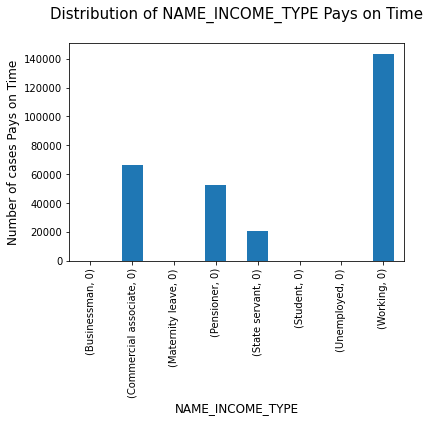

In [167]:
income_pay.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of NAME_INCOME_TYPE Pays on Time\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("NAME_INCOME_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Pays on Time", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

###  From Above we can observe working class & Commercial associate show almost equal trend in defaulter and pays on time. but servent class is less defaulter.

In [168]:
#creating new dataframe for education type and target variable
education = app_data[['NAME_EDUCATION_TYPE']+["TARGET"]]
education

NAME_EDUCATION_TYPE  TARGET
0       Secondary / secondary special       1
1                    Higher education       0
2       Secondary / secondary special       0
3       Secondary / secondary special       0
4       Secondary / secondary special       0
...                               ...     ...
307506  Secondary / secondary special       0
307507  Secondary / secondary special       0
307508               Higher education       0
307509  Secondary / secondary special       1
307510               Higher education       0

[307496 rows x 2 columns]

In [169]:
#compare it with default
education_def = education.loc[income['TARGET']==1,:]
education_def

NAME_EDUCATION_TYPE  TARGET
0       Secondary / secondary special       1
26      Secondary / secondary special       1
40      Secondary / secondary special       1
42      Secondary / secondary special       1
81      Secondary / secondary special       1
...                               ...     ...
307448  Secondary / secondary special       1
307475               Higher education       1
307481  Secondary / secondary special       1
307489  Secondary / secondary special       1
307509  Secondary / secondary special       1

[24825 rows x 2 columns]

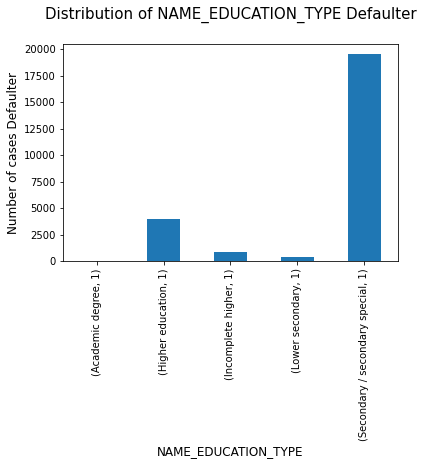

In [170]:
education_def.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of NAME_EDUCATION_TYPE Defaulter\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("NAME_EDUCATION_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Defaulter", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [171]:
#compare it with pays on time
education_pay = education.loc[education['TARGET']==0,:]
education_pay

NAME_EDUCATION_TYPE  TARGET
1                    Higher education       0
2       Secondary / secondary special       0
3       Secondary / secondary special       0
4       Secondary / secondary special       0
5       Secondary / secondary special       0
...                               ...     ...
307505  Secondary / secondary special       0
307506  Secondary / secondary special       0
307507  Secondary / secondary special       0
307508               Higher education       0
307510               Higher education       0

[282671 rows x 2 columns]

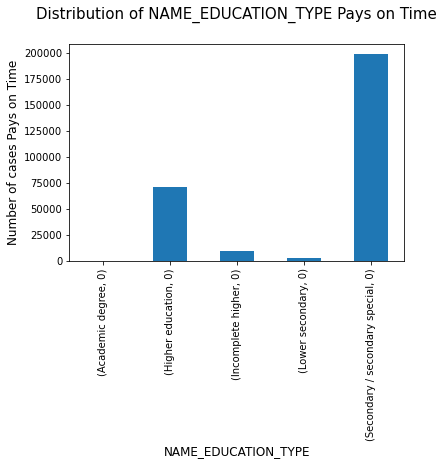

In [172]:
education_pay.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of NAME_EDUCATION_TYPE Pays on Time\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("NAME_EDUCATION_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Pays on Time", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

### Higher education default less

In [173]:
##creating new dataframe for family status type and target variable
family = app_data[['NAME_FAMILY_STATUS']+["TARGET"]]
family

NAME_FAMILY_STATUS  TARGET
0       Single / not married       1
1                    Married       0
2       Single / not married       0
3             Civil marriage       0
4       Single / not married       0
...                      ...     ...
307506             Separated       0
307507                 Widow       0
307508             Separated       0
307509               Married       1
307510               Married       0

[307496 rows x 2 columns]

In [174]:
#compare it with default
family_def = family.loc[family['TARGET']==1,:]
family_def

NAME_FAMILY_STATUS  TARGET
0       Single / not married       1
26                     Widow       1
40                   Married       1
42            Civil marriage       1
81                   Married       1
...                      ...     ...
307448               Married       1
307475        Civil marriage       1
307481               Married       1
307489        Civil marriage       1
307509               Married       1

[24825 rows x 2 columns]

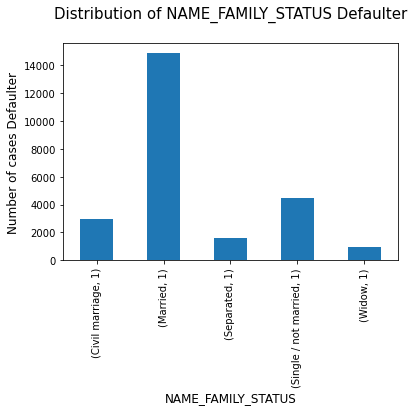

In [175]:
family_def.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of NAME_FAMILY_STATUS Defaulter\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("NAME_FAMILY_STATUS", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Defaulter", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [176]:
#compare it with pays on time
family_pay = family.loc[family['TARGET']==0,:]
family_pay

NAME_FAMILY_STATUS  TARGET
1                    Married       0
2       Single / not married       0
3             Civil marriage       0
4       Single / not married       0
5                    Married       0
...                      ...     ...
307505  Single / not married       0
307506             Separated       0
307507                 Widow       0
307508             Separated       0
307510               Married       0

[282671 rows x 2 columns]

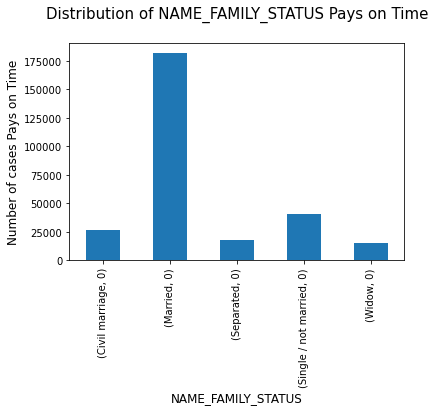

In [177]:
family_pay.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().plot.bar()

#Adding the title
plt.title("Distribution of NAME_FAMILY_STATUS Pays on Time\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("NAME_FAMILY_STATUS", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Number of cases Pays on Time", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

### Maried people are less Defaulter

In [178]:
#creating new dataframe for amount credit and target variable
amt_credit =app_data[['AMT_CREDIT']+["TARGET"]]
amt_credit



AMT_CREDIT  TARGET
0         4.065975       1
1        12.935025       0
2         1.350000       0
3         3.126825       0
4         5.130000       0
...            ...     ...
307506    2.547000       0
307507    2.695500       0
307508    6.776640       0
307509    3.701070       1
307510    6.750000       0

[307496 rows x 2 columns]

In [179]:
#compare it with default
credit_pay = amt_credit.loc[amt_credit['TARGET']==1,:]
credit_pay

AMT_CREDIT  TARGET
0         4.065975       1
26        9.799920       1
40       11.935800       1
42        2.888730       1
81        2.520000       1
...            ...     ...
307448    4.500000       1
307475   13.032000       1
307481    2.970000       1
307489    5.212800       1
307509    3.701070       1

[24825 rows x 2 columns]

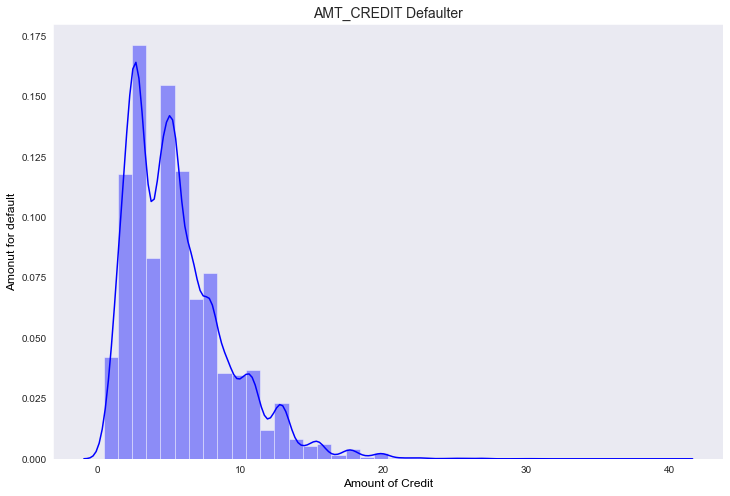

In [180]:
sns.set_style('dark')
plt.figure(figsize=[12,8])
sns.distplot(credit_pay.AMT_CREDIT,bins= 40,color='b')
plt.title('AMT_CREDIT Defaulter',fontsize = 14)
plt.xlabel("Amount of Credit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Amonut for default", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


plt.show()

In [181]:
#compare it with pays on time
credit_pay = amt_credit.loc[amt_credit['TARGET']==0,:]
credit_pay

AMT_CREDIT  TARGET
1        12.935025       0
2         1.350000       0
3         3.126825       0
4         5.130000       0
5         4.904955       0
...            ...     ...
307505    2.250000       0
307506    2.547000       0
307507    2.695500       0
307508    6.776640       0
307510    6.750000       0

[282671 rows x 2 columns]

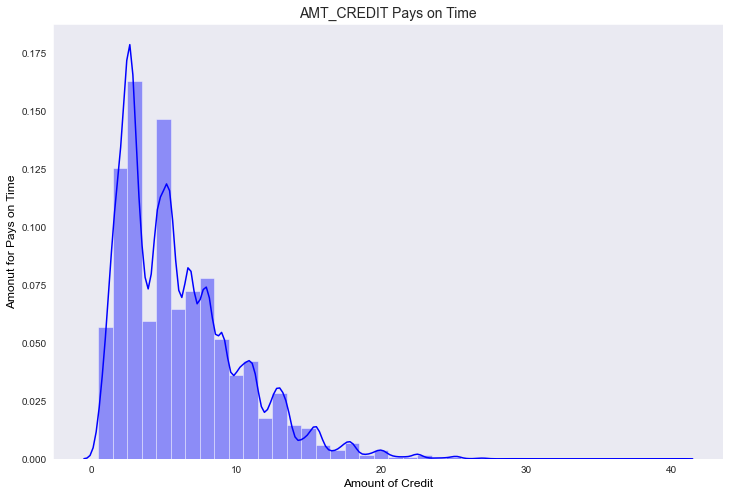

In [182]:
sns.set_style('dark')
plt.figure(figsize=[12,8])
sns.distplot(credit_pay.AMT_CREDIT,bins= 40,color='b')
plt.title('AMT_CREDIT Pays on Time',fontsize = 14)
plt.xlabel("Amount of Credit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Amonut for Pays on Time", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


plt.show()

## Insight:
### Higher the amount less default and low to middle level income are at risk.

# Categorical Bi/Multivariate Analysis

In [183]:
new_data= app_data[['NAME_INCOME_TYPE']+["TARGET",'AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','CODE_GENDER','NAME_FAMILY_STATUS']]
new_data["TARGET"] = b["TARGET"].replace({1:"Defaulter",0:"Repayer"})
new_data


NAME_INCOME_TYPE     TARGET  AMT_CREDIT  AMT_INCOME_TOTAL  \
0                    Working  Defaulter    4.065975             2.025   
1              State servant    Repayer   12.935025             2.700   
2                    Working    Repayer    1.350000             0.675   
3                    Working    Repayer    3.126825             1.350   
4                    Working    Repayer    5.130000             1.215   
...                      ...        ...         ...               ...   
307506               Working    Repayer    2.547000             1.575   
307507             Pensioner    Repayer    2.695500             0.720   
307508               Working    Repayer    6.776640             1.530   
307509  Commercial associate  Defaulter    3.701070             1.710   
307510  Commercial associate    Repayer    6.750000             1.575   

        AMT_ANNUITY CODE_GENDER    NAME_FAMILY_STATUS  
0           24700.5           M  Single / not married  
1           35698.5           F               Married  
2            6750.0           M  Single / not married  
3           29686.5           F        Civil marriage  
4           21865.5           M  Single / not married  
...             ...         ...                   ...  
307506      27558.0           M             Separated  
307507      12001.5           F                 Widow  
307508      29979.0           F             Separated  
307509      20205.0           F               Married  
307510      49117.5           F               Married  

[307496 rows x 7 columns]

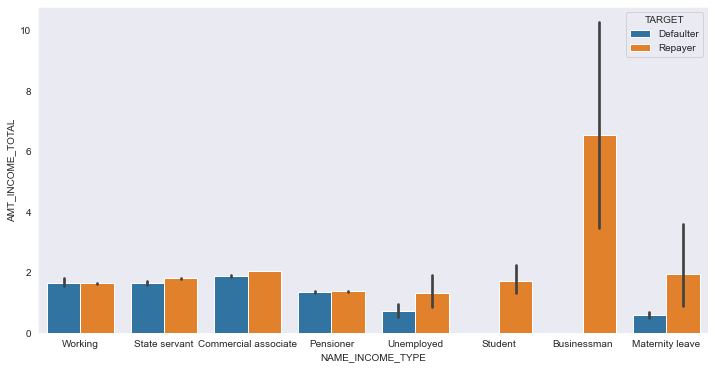

In [184]:
fig = plt.figure(figsize=(12,6))
sns.barplot(data= new_data, x ='NAME_INCOME_TYPE',y ='AMT_INCOME_TOTAL',hue= 'TARGET')
plt.show()

### the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs, Businessman pays on time..

In [185]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0             2.025    4.065975      24700.5   
1               N             0             2.700   12.935025      35698.5   
2               Y             0             0.675    1.350000       6750.0   
3               Y             0             1.350    3.126825      29686.5   
4               Y             0             1.215    5.130000      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801      9461.0          637.0             3648.0   
1                    0.003541     16765.0         1188.0             1186.0   
2                    0.010032     19046.0          225.0             4260.0   
3                    0.008019     19005.0         3039.0             9833.0   
4                    0.028663     19932.0         3038.0             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           2120.0        Laborers              1.0                     2   
1            291.0      Core staff              2.0                     1   
2           2531.0        Laborers              1.0                     2   
3           2437.0        Laborers              2.0                     2   
4           3458.0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

In [186]:
pre_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             73  Cash through the bank                XAP         Repeater   
1            164                    XNA                XAP         Repeater   
2            301  Cash through the bank                XAP         Repeater   
3            512  Cash through the bank                XAP         Repeater   
4            781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

## Merging current  Application & previous application data set.

In [187]:
merge_data = pd.merge(app_data,pre_data,how = 'inner',on = 'SK_ID_CURR' )

In [188]:
merge_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0             2.025      4.065975   
1               N             0             2.700     12.935025   
2               N             0             2.700     12.935025   
3               N             0             2.700     12.935025   
4               Y             0             0.675      1.350000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801      9461.0          637.0             3648.0   
1                    0.003541     16765.0         1188.0             1186.0   
2                    0.003541     16765.0         1188.0             1186.0   
3                    0.003541     16765.0         1188.0             1186.0   
4                    0.010032     19046.0          225.0             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           2120.0        Laborers              1.0                     2   
1            291.0      Core staff              2.0                     1   
2            291.0      Core staff              2.0                     1   
3            291.0      Core staff              2.0                     1   
4           2531.0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            1                     MONDAY   
3                            1                     MONDAY   
4                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2               

In [189]:
merge_data.shape

(1413607, 73)

In [190]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413607 entries, 0 to 1413606
Data columns (total 73 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413607 non-null  int64   
 1   TARGET                       1413607 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413607 non-null  object  
 3   CODE_GENDER                  1413607 non-null  object  
 4   FLAG_OWN_CAR                 1413607 non-null  object  
 5   FLAG_OWN_REALTY              1413607 non-null  object  
 6   CNT_CHILDREN                 1413607 non-null  int64   
 7   AMT_INCOME_TOTAL             1413607 non-null  float64 
 8   AMT_CREDIT_x                 1413607 non-null  float64 
 9   AMT_ANNUITY_x                1413607 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413607 non-null  float64 
 11  NAME_TYPE_SUITE              1413607 non-null  object  
 12  NAME_INCOME_TYPE            

In [191]:
#checking value count of cotract type from previous application
merge_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        886052
Canceled        259412
Refused         245373
Unused offer     22770
Name: NAME_CONTRACT_STATUS, dtype: int64

In [192]:
#checking in term of percentage
merge_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.680222
Canceled        18.351069
Refused         17.357936
Unused offer     1.610773
Name: NAME_CONTRACT_STATUS, dtype: float64

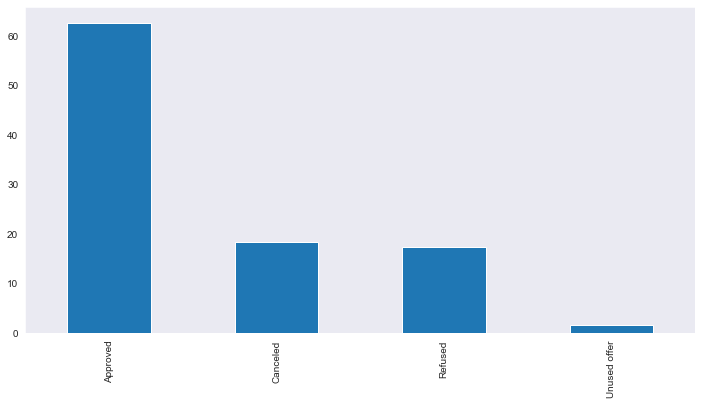

In [193]:
fig = plt.figure(figsize=(12,6))
(merge_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100).plot.bar()
plt.show()

### Approved status account for approx. 62% and unused offer in approx. 2% as this is small group we can ignore it now.


In [194]:
#comparing contract status with target variable.
merge_data.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].value_counts(normalize=True)*100

NAME_CONTRACT_STATUS  TARGET
Approved              0         92.411055
                      1          7.588945
Canceled              0         90.825405
                      1          9.174595
Refused               0         88.002755
                      1         11.997245
Unused offer          0         91.747914
                      1          8.252086
Name: TARGET, dtype: float64

In [195]:
me_data= merge_data[['NAME_CONTRACT_STATUS']+["TARGET"]]
me_data["TARGET"] = b["TARGET"].replace({1:"Defaulter",0:"Repayer"})
me_data


NAME_CONTRACT_STATUS     TARGET
0                   Approved  Defaulter
1                   Approved    Repayer
2                   Approved    Repayer
3                   Approved    Repayer
4                   Approved    Repayer
...                      ...        ...
1413602             Approved        NaN
1413603              Refused        NaN
1413604              Refused        NaN
1413605             Approved        NaN
1413606             Approved        NaN

[1413607 rows x 2 columns]

In [196]:
merge_data.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].value_counts(normalize=True)*100

NAME_CONTRACT_STATUS  TARGET
Approved              0         92.411055
                      1          7.588945
Canceled              0         90.825405
                      1          9.174595
Refused               0         88.002755
                      1         11.997245
Unused offer          0         91.747914
                      1          8.252086
Name: TARGET, dtype: float64

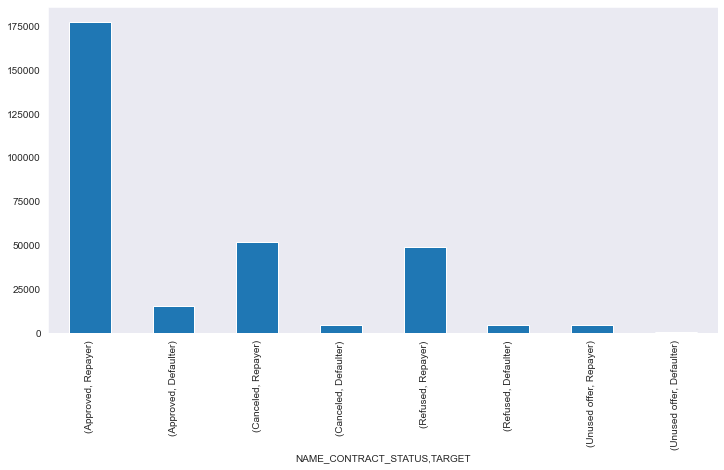

In [197]:
#plotting contract status vs target variable.
fig = plt.figure(figsize=(12,6))
me_data.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].value_counts().plot.bar()
plt.show()

## 90% of the previously cancelled application actually repay the loan in current case.
## 92% Of the previously approved loan client repay the loan, around 7% are defaulter